In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
#Other necessary imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import keras
from keras import models
from keras import layers
from keras.models import load_model
from sklearn.utils import compute_class_weight

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

Source for plot confusion matrix: <br> https://stackoverflow.com/questions/69875073/confusion-matrix-valueerror-classification-metrics-cant-handle-a-mix-of-binary

In [3]:
#Evaluate each model
def evaluate_model(model, x_train, y_train, x_val, y_val):
    '''
    Evaluate model by displaying confusion matrix of validation data, 
    and also by displaying a DataFrame with Loss, Accuracy, Recall, and AUC-ROC for both train and val datasets
    
    Input: 
    -model to be evaluated
    -x_train: predictors from training data
    -y_train: target from training data
    -x_val: predictors from validation data
    -y_val: target from validation data
    
    Output:
    -Confusion matrix of y_val and model predictions
    -DataFrame with Loss, Accuracy, Recall, and AUC-ROC for both train and val datasets
    '''

    #Plot Confusion Matrix
    y_preds = model.predict(x_val)
    y_preds = y_preds.flatten()
    y_preds = np.where(y_preds > 0.5, 1, 0)
    cm = confusion_matrix(y_val, y_preds, normalize = None)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
    disp.plot()
    plt.show()
    
    #Create a DataFrame with the results 
    model_train = model.evaluate(x_train, y_train, verbose=0)
    model_val = model.evaluate(x_val, y_val, verbose=0)
    model_results = {"Training":[],"Validation":[]};
    for i in range(4):
        model_results['Training'].append(round(model_train[i],3))
        model_results['Validation'].append(round(model_val[i],3))
    model_results_df = pd.DataFrame.from_dict(data = model_results,
                                                   orient = 'index', 
                                                   columns = ['Loss', 'Accuracy', 'Recall', 'AUC-ROC'])
    display(model_results_df)

# Load Preprocessed Data

In [4]:
#Load data
train_images = np.load('../input/eda-and-data-preprocessing/train_images.npy')
train_labels = np.load('../input/eda-and-data-preprocessing/train_labels.npy')

train_images_third = np.load('../input/eda-and-data-preprocessing/train_images_third.npy')
train_labels_third = np.load('../input/eda-and-data-preprocessing/train_labels_third.npy')

val_images = np.load('../input/eda-and-data-preprocessing/val_images.npy')
val_labels = np.load('../input/eda-and-data-preprocessing/val_labels.npy')

test_images = np.load('../input/eda-and-data-preprocessing/test_images.npy')
test_labels = np.load('../input/eda-and-data-preprocessing/test_labels.npy')

In [5]:
#Explore the dataset again
print ("Number of training samples: " + str(train_images.shape[0]))
print ("A third of training samples: " + str(train_images_third.shape[0]))
print ("Number of validation samples: " + str(val_images.shape[0]))
print ("Number of testing samples: " + str(test_images.shape[0]))
print ("===")
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("A third of train_images shape: " + str(train_images_third.shape))
print ("A third of train_labels shape: " + str(train_labels_third.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

Number of training samples: 25803
A third of training samples: 8601
Number of validation samples: 8602
Number of testing samples: 3823
===
train_images shape: (25803, 128, 128, 3)
train_labels shape: (25803,)
A third of train_images shape: (8601, 128, 128, 3)
A third of train_labels shape: (8601,)
val_images shape: (8602, 128, 128, 3)
val_labels shape: (8602,)
test_images shape: (3823, 128, 128, 3)
test_labels shape: (3823,)


# Load Models

In [6]:
#Load second cnn model with dropouts
second_cnn_model = load_model('../input/second-cnn-model/best_cnn2_model.h5')
second_cnn_model.summary()


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [7]:
#Load VGG16 model
vgg16_model = load_model('../input/vgg16-model/best_vgg16_model.h5')
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 15,763,521
Trainable params: 1,048,833
Non-trainable params: 14,714,688
_________________________________________________________________


# Evaluate

2021-11-30 03:22:12.594323: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


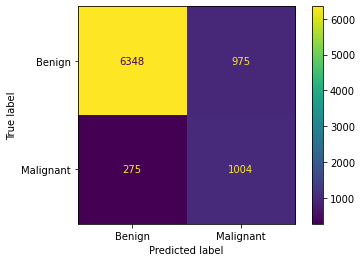

,Loss,Accuracy,Recall,AUC-ROC
Training,0.440,0.853,0.790,0.863
Validation,0.443,0.855,0.785,0.855


In [8]:
#Evaluate second cnn model dropouts
evaluate_model(second_cnn_model, train_images_third, train_labels_third, val_images, val_labels)

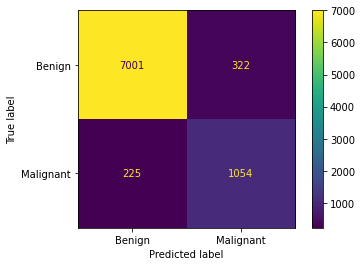

,Loss,Accuracy,Recall,AUC-ROC
Training,0.069,0.977,0.959,0.995
Validation,0.195,0.936,0.824,0.947


In [9]:
#Evaluate VGG16 model
evaluate_model(vgg16_model, train_images_third, train_labels_third, val_images, val_labels)